# PL: Index SP500
# ENG: SP 500 index

S&P 500 – indeks giełdowy, w skład którego wchodzi 500 przedsiębiorstw o największej kapitalizacji, notowanych na New York Stock Exchange i NASDAQ. Są to głównie przedsiębiorstwa amerykańskie. Indeks ten jest najbardziej znanym wskaźnikiem zarządzanym przez Standard & Poor's oddział McGraw-Hill. https://pl.wikipedia.org/wiki/S%26P_500

The S&P 500, or simply the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The average annual total return of the index, including dividends, since inception in 1926 has been 9.8%; however, there were several years where the index declined over 30%. The index has posted annual increases 70% of the time.
https://en.wikipedia.org/wiki/S%26P_500_Index

In [32]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import quandl
import matplotlib.pyplot as plt
import math as math
import os 
import plotly.express as px
%matplotlib inline

In [33]:
#Opcje wyswietlania wyników biblioteki pandas
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [34]:
indicator="SP500"

#Wybranie aktualnej daty 
#Geting current date to the website
now = dt.datetime.now()
year = '{:02d}'.format(now.year)
month = '{:02d}'.format(now.month)
day = '{:02d}'.format(now.day)

#Wyswietlanie daty
#Display data
day_month_year = '{}{}{}'.format(year, month, day)

print(day_month_year)

#Dodanie aktualnej daty do adresu strony internetowej
#Adding date to website link
url1="https://stooq.com/q/d/l/?s=^spx&d1=20100101&d2="
url2="&i=d"
url3=url1+day_month_year+url2

#Wyswietlanie adresu strony
#Display website link
print(url3)



20200509
https://stooq.com/q/d/l/?s=^spx&d1=20100101&d2=20200509&i=d


In [35]:
#Załadowanie pliku csv do ramki danych
df=pd.read_table(url3,sep=',' ,engine='python')
df.head()

print(df.tail())


            Date     Open     High      Low    Close        Volume
2600  2020-05-04  2815.01  2844.24  2797.85  2842.74  6.508361e+08
2601  2020-05-05  2868.88  2898.23  2863.55  2868.44           NaN
2602  2020-05-06  2883.14  2891.11  2847.65  2848.42           NaN
2603  2020-05-07  2878.26  2901.92  2876.48  2881.19           NaN
2604  2020-05-08  2908.83  2932.16  2902.88  2929.80  2.605535e+09


In [36]:
#Zmienianie nazwy kolumn
#Rename columns
df = df.rename(columns={df.columns[0]: 'Date', df.columns[4]: 'USD'})
df = df[['Date', 'USD']].copy()
df.dropna(subset = ['USD'], inplace=True)

#Wybieranie cen akcji od daty 2010-01-01
#Select price from 2010-01-01
filter = (df['Date'] >= '2010-01-01')
df = df[filter]

df.tail(10)

Date      USD
2595  2020-04-27  2878.48
2596  2020-04-28  2863.39
2597  2020-04-29  2939.51
2598  2020-04-30  2912.43
2599  2020-05-01  2830.71
2600  2020-05-04  2842.74
2601  2020-05-05  2868.44
2602  2020-05-06  2848.42
2603  2020-05-07  2881.19
2604  2020-05-08  2929.80

In [37]:
#Wyswietlanie danych na wykresie przy pomocy biblioteki plotly.express
#Displaying data in graph with plotly.express
fig = px.line(df, x='Date', y='USD')

fig.update_layout(
    title_text= indicator +" - ceny akcji od 2010 do teraz, źrodło:\"stooq.com\"" +'<br>'+ indicator+" stocks price from 2010-current, source:\"stooq.com\"",title_x=0.5,
    xaxis_title="Data (Date)",
    yaxis_title="Cena (USD)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ))

fig.show()


# PL: Przewidywanie indexu SP500 przy użyciu Prophet
# ENG: Prediction SP500 Index with Prophet

In [38]:
#Konwertowanie kolumny data na typ daty
#Convert column type to date time
df["Date"] = pd.to_datetime(df["Date"])

#Ustawienie kolumny Date jako index
#Set date to index
df.index = df['Date']
df = df.drop(columns=['Date'])

df.tail()

USD
Date               
2020-05-04  2842.74
2020-05-05  2868.44
2020-05-06  2848.42
2020-05-07  2881.19
2020-05-08  2929.80

In [39]:
#Resetowanie indexu
#Reset index
df = df.reset_index()

#Zmiana nazwy kolumn dla biblioteki prophet
#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'USD': 'y'})

#Wyswietlanie ramki danych df
#Display Data Frame df
df.tail()

ds        y
2600 2020-05-04  2842.74
2601 2020-05-05  2868.44
2602 2020-05-06  2848.42
2603 2020-05-07  2881.19
2604 2020-05-08  2929.80

In [40]:
#Importowanie biblioteki Prophet
#Import Prophet library
from fbprophet import Prophet

#Inicjowanie nowego objektu Prophet
#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Wywołanie metody dopasowania obiektu i wprowadzenie jej w ramke danych df
#Call object's fit method and pass in the historical dataframe
m.fit(df)

In [41]:
#Dodanie przyszłych dat do kolumny "ds"
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2965 2021-05-04
2966 2021-05-05
2967 2021-05-06
2968 2021-05-07
2969 2021-05-08

In [42]:
#Przypisane przewidywanych danych
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2965 2021-05-04  3209.449761  3061.196678  3359.803520
2966 2021-05-05  3207.744471  3043.120016  3351.389603
2967 2021-05-06  3208.850398  3047.962142  3357.704747
2968 2021-05-07  3208.661012  3049.274875  3351.382134
2969 2021-05-08  3214.698148  3060.939876  3360.574111

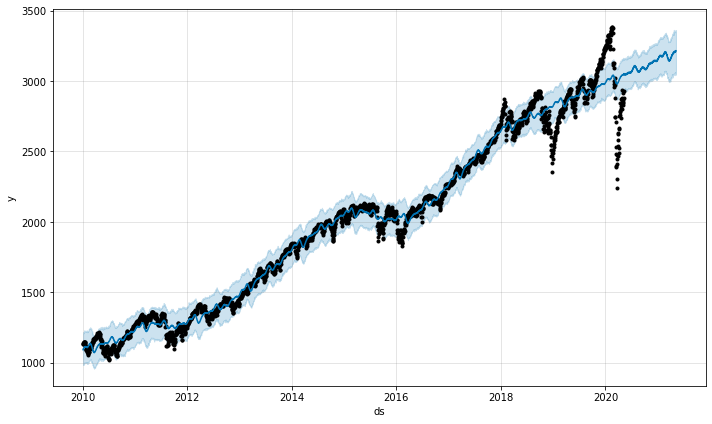

In [43]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig1 = m.plot(forecast)

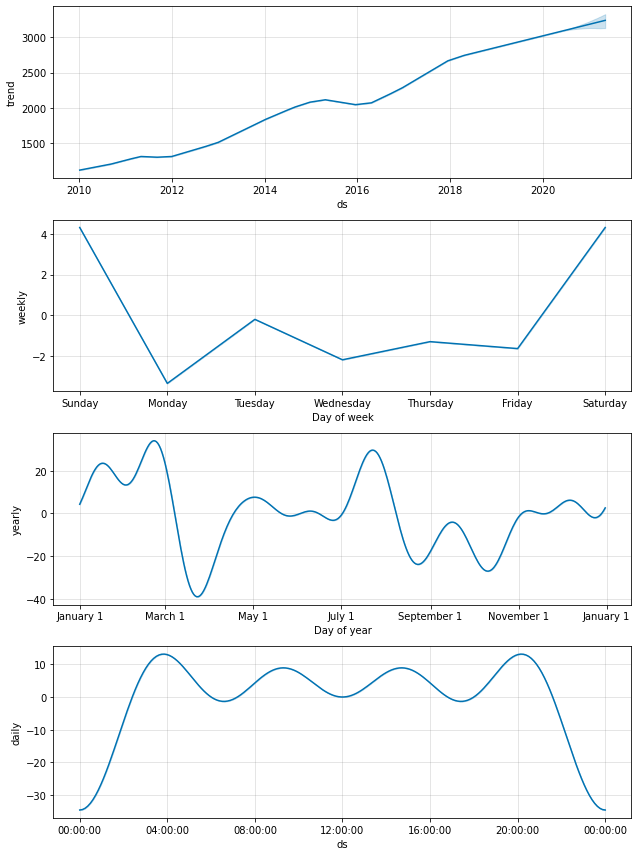

In [44]:
#Przedstawienie wykresów komponentów (trend)
#Show a plot with components
fig2 = m.plot_components(forecast)

In [45]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

#Dodanie lini trendu to wykresu
#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

#Wyswietlanie grafu z przewidywanymi wartosciami (Etykiety, tytuł itp)
#Show a plot with the forecast
fig.update_layout(
    title=(indicator +" przewidywane ceny akcji do 2021 - źrodło:\"stooq.com\"" +'<br>'+ indicator+ " price forecast 2021 using Prophet - source:\"stooq.com\""),
    xaxis_title="Data (Date)",
    yaxis_title="Cena (Price)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

In [46]:
#Złączanie dwóch ramek danych 
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Zmiana nazwy  kolumn
#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Wyswietlanie pierwszych pozycji w ramce danych
#Display header
df2.tail(15)

Date  Index     Forecast  Forecast_(lower)  Forecast_(upper)
2955 2021-04-24    NaN  3207.313366       3050.081005       3350.292796
2956 2021-04-25    NaN  3208.297247       3049.391502       3348.985710
2957 2021-04-26    NaN  3201.553803       3052.002649       3350.661017
2958 2021-04-27    NaN  3205.538849       3050.265352       3356.996311
2959 2021-04-28    NaN  3204.322263       3040.702564       3356.520736
2960 2021-04-29    NaN  3205.912675       3055.569317       3351.356487
2961 2021-04-30    NaN  3206.200738       3042.609749       3351.346791
2962 2021-05-01    NaN  3212.704395       3061.594027       3345.241321
2963 2021-05-02    NaN  3213.192595       3057.552315       3349.907605
2964 2021-05-03    NaN  3205.955949       3048.927326       3353.081453
2965 2021-05-04    NaN  3209.449761       3061.196678       3359.803520
2966 2021-05-05    NaN  3207.744471       3043.120016       3351.389603
2967 2021-05-06    NaN  3208.850398       3047.962142       3357.704747
2968 2021-05-07    NaN  3208.661012       3049.274875       3351.382134
2969 2021-05-08    NaN  3214.698148       3060.939876       3360.574111

In [47]:
#Obliczanie średniej dla kazdej kolumny
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Słownik dla wartosci średnich
#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})
#Wyswietlanie średnich wartości
#Display mean
print('Mean: ')
meanDict

Mean: 


{'Index': 1997.1560000000004,
 'Forecast': 2135.497623016557,
 'Forecast_(Lower)': 2021.9287155218435,
 'Forecast_(Upper)': 2248.5977505324045}

In [48]:
#Maksymalne wartosci
#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Słownik dla wartosci maksymalnych
#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})
#Wyswietlanie maksymalnych wartości
#Display max
print('Max value: ')
maxDict

Max value: 


{'Index': 3386.15,
 'Forecast': 3214.6981476524816,
 'Forecast_(Lower)': 3072.4963836821926,
 'Forecast_(Upper)': 3363.130159353969}

In [49]:
#Minimalne wartosci
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Słownik z wartosciami minimalnymi
#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Wyswietlanie minimalnych wartości
#Display min
print('Min: ')
minDict

Min: 


{'Index': 1022.58,
 'Forecast': 1071.6805737032744,
 'Forecast_(Lower)': 957.6885736395534,
 'Forecast_(Upper)': 1176.9315938613408}

In [50]:
#Wyswietlanie ile rekordow znajduje się powyzej lub ponizej przewidywanej wartosci akcji
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [51]:
#Wyswietlanie kiedy wystapila najmiejsza wartość
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa wartość
#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila najmiejsza przewidywana wartość
#Smallest predicted value date
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa przewidywana wartość
#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2021-05-08'

# ENG: Podsumowanie
# PL: SUMARRY

In [52]:
print('Średnia wartosc wynosi %f a średnia przewidywana wartosc wynosi %f .' % (meanIndex, meanForecast))
print('Wystąpiło %d rekordów (wartości) powyżej przewidywanej wartości.' % len(df2[indexAboveMeanForecast]))
print('Wystąpiło %d rekordów (wartości) poniżej przewidywanej wartości.' % len(df2[indexBelowMeanForecast]))
print('Najmiejsza wartość wynosi %f i miala miejsce %s .' % (minIndexValue, minIndexDate))
print('Największa wartośc wynosi %f i miała miejsce %s .' % (maxIndexValue, maxIndexDate))
print('Najmiejsza przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (minForecastValue, minForecastDate))
print('Największa przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (maxForecastValue, maxForecastDate))

Średnia wartosc wynosi 1997.156000 a średnia przewidywana wartosc wynosi 2135.497623 .
Wystąpiło 951 rekordów (wartości) powyżej przewidywanej wartości.
Wystąpiło 1654 rekordów (wartości) poniżej przewidywanej wartości.
Najmiejsza wartość wynosi 1022.580000 i miala miejsce 2010-07-02 .
Największa wartośc wynosi 3386.150000 i miała miejsce 2020-02-19 .
Najmiejsza przewidywana wartość wynosi 1071.680574 i będzie miala miejsce 2010-03-22 .
Największa przewidywana wartość wynosi 3214.698148 i będzie miala miejsce 2021-05-08 .


In [53]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 1997.156000 and the average predicted value is 2135.497623 .
There are 951 rows (values) above average predicted value.
There are 1654 rows (values) below average predicted value.
The smallest index value is 1022.580000 on 2010-07-02 .
The largest index value is 3386.150000 on 2020-02-19 .
The smallest predicted value is 1071.680574 on 2010-03-22 .
The largest predicted value is 3214.698148 on 2021-05-08 .


# PL: Zapisywanie ramki danych do bazy danych
# ENG: Saving DF with predictions to DB

In [54]:
#Sciezka pod ktorym folderem zapisywana jest baza danych SQLlite
#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

import sqlite3

In [55]:
#Nawiązanie połączenia z bazą danych SQLLite (predictions)
#Connecting with database
conn = sqlite3.connect('predictionsLS.db')
c = conn.cursor()

In [56]:
#Tworzenie tabeli w bazie
# Creating a table 
c.execute('CREATE TABLE IF NOT EXISTS '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

In [57]:
#Zapisywanie ramki danych do bazy danych
# Saving data frame to database
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [58]:
#Wyciąganie danych z bazy (w celu sprawdzenia poprawności kodu)
# Extracing records from database (just for a test)


c.execute("SELECT *  FROM "+indicator+"")
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 1132.99, 1092.5660934427954, 983.6165691764086, 1208.6325543258924)
('2010-01-05 00:00:00', 1136.52, 1097.7373893254344, 987.952122401622, 1217.1765080382538)
('2010-01-06 00:00:00', 1137.14, 1097.7919571832315, 984.4988326669238, 1207.0739570607125)
('2010-01-07 00:00:00', 1141.69, 1100.7063931236803, 984.5946873490898, 1213.2248131096887)
('2010-01-08 00:00:00', 1144.98, 1102.3395935994724, 991.3052148421388, 1215.6155861223754)
('2010-01-11 00:00:00', 1146.98, 1105.957076094889, 989.5805124074159, 1219.556684134224)
('2010-01-12 00:00:00', 1136.22, 1110.5907946442096, 1001.7484354187284, 1224.1472354825312)
('2010-01-13 00:00:00', 1145.68, 1109.9137013857892, 1001.9192217683385, 1230.9391438175526)
('2010-01-14 00:00:00', 1148.46, 1111.9184637321987, 999.5914190154901, 1227.8663631148336)
('2010-01-15 00:00:00', 1136.03, 1112.4848104846346, 995.8163495392639, 1222.2906061484266)
('2010-01-19 00:00:00', 1150.23, 1115.4503457153237, 1000.571043433386, 1224.3523

('2015-12-29 00:00:00', 2078.36, 2014.1815012213967, 1901.9879295793671, 2123.302565232247)
('2015-12-30 00:00:00', 2063.36, 2013.3312762186395, 1900.9899170997335, 2134.44292324714)
('2015-12-31 00:00:00', 2043.94, 2015.5288609951347, 1915.0273025224274, 2128.9160772780606)
('2016-01-04 00:00:00', 2012.66, 2020.0537225185192, 1917.6998342530287, 2130.453653536974)
('2016-01-05 00:00:00', 2016.71, 2025.0603920838514, 1907.0120088561935, 2138.522306092759)
('2016-01-06 00:00:00', 1990.26, 2024.965947908459, 1918.538429864868, 2135.0123339324364)
('2016-01-07 00:00:00', 1943.09, 2027.7472781316874, 1911.58861989185, 2145.0741055903773)
('2016-01-08 00:00:00', 1922.03, 2029.2631698040284, 1921.884618046436, 2141.7246875865794)
('2016-01-11 00:00:00', 1923.67, 2032.6163928794062, 1922.7963591052792, 2135.823438013634)
('2016-01-12 00:00:00', 1938.68, 2037.186968472189, 1925.6539869108005, 2150.7693701584194)
('2016-01-13 00:00:00', 1890.28, 2036.4562086994642, 1913.3939178912203, 2136.9104

('2021-04-02 00:00:00', None, 3158.710267451874, 3015.7364764088907, 3293.007380090462)
('2021-04-03 00:00:00', None, 3167.139740714172, 3028.426339034721, 3309.375431509981)
('2021-04-04 00:00:00', None, 3169.6678729146633, 3026.8844416324637, 3301.8945188425687)
('2021-04-05 00:00:00', None, 3164.559093982295, 3016.3487538883146, 3307.068223635131)
('2021-04-06 00:00:00', None, 3170.244395132576, 3019.142181070648, 3304.358435197898)
('2021-04-07 00:00:00', None, 3170.7718487419456, 3020.1694436613284, 3313.6189805722674)
('2021-04-08 00:00:00', None, 3174.1313585549033, 3027.2513605127824, 3315.197646778347)
('2021-04-09 00:00:00', None, 3176.197889471839, 3038.903732005714, 3315.9864328859007)
('2021-04-10 00:00:00', None, 3184.4765828168943, 3047.6629378231423, 3323.857187385742)
('2021-04-11 00:00:00', None, 3186.7262325824404, 3033.709232136455, 3333.7812348477487)
('2021-04-12 00:00:00', None, 3181.229624798192, 3038.207929757524, 3323.3747938653787)
('2021-04-13 00:00:00', Non